<a href="https://colab.research.google.com/github/viriditass/TIL/blob/main/Attention_Is_All_You_Need.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Attention Is All You Need**

논문 링크: https://arxiv.org/abs/1706.03762

먼저 Attention에 대하여 살펴보겠다.

## **Attention**

### 등장 배경
NLP에서 RNN과 LSTM과 같은 모델들은 셀 자체적으로 메모리를 가지게 되면서, 앞 내용을 어느 정도 기억하고 뒷 내용을 보다 잘 예측할 수 있게 해줬다. 하지만 이 또한 두 가지의 고질적인 문제점을 가지고 있다.

정보의 크기가 너무 커버리면 압축하는데 그 만큼 발생하는 정보 손실량이 많아진다.
RNN의 고질적인 문제인 기울기 소실(Vanishing Gradient)문제가 발생해버린다.

### 어텐션 함수

**Atention(Q, K, V) = Attention Value**

어텐션 함수는 Query에 대해서 모든 Key와의 유사도를 구한다. 그리고 구해낸 이 유사도를 키와 맵핑되어 있는 각각의 Value를 모두 더해서 리턴한다. 여기서 리턴되는 값이 바로 Attention Value다.

- Q = Quary: t 시점의 디코더 셀에서의 은닉 상태
- K = Keys: 모든 시점의 인코더 셀의 은닉 상태들
- V = Values: 모든 시점의 인코더 셀의 은닉 상태들


### 닷-프로덕트 어텐션
다양한 종류의 어텐션 중, 가장 많이 언급되는 닷-프로덕트 어텐션(Dot-Product Attention)을 적는다. 다른 어텐션들과의 차이는 어떻게 계산하냐의 차이일뿐 메커니즘 자체는 유사하다고 한다.
이탤릭체 텍스트
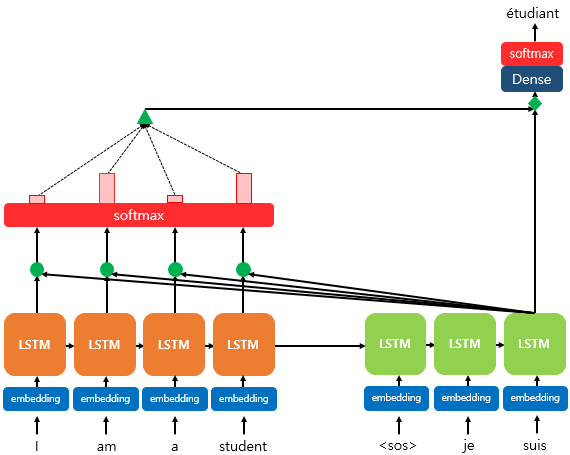

위 그림은 디코더의 세번째 LSTM 셀에서 출력 단어를 예측할 때 어텐션 메커니즘을 사용하는 것을 보여준다.

그림을 간단하게 설명하자면, 디코더의 세번째 LSTM 셀에서 출력 단어를 예측하기 위해서 그 시간의 인코더의 모든 은닉 상태를 다시 한 번 참고한다.

소프트맥스 함수를 통해 나온 결과값은 인코더의 각 단어들이 출력 단어를 예측할 때 얼마나 도움이 되는지를 수치화 한 것인데, 직사각형의 크기가 클 수록 더 도움이 된다는 뜻이다. 이 결과값을 벡터로 담아 디코더로 전송한다.

#### 1)어텐션 스코어

기존 seq2seq에서는 T 시점에서 출력 단어를 예측하기 위해서 T-1 시점의 은닉 상태와 T-1 시점에서 나온 출력 단어가 필요하다. 어텐션 메커니즘은 여기에 어텐션 값(Attention Value)이라는 새로운 값이 필요하다. T번째 단어를 예측하기 위한 어텐션 값을 a(t)라고 정의한다.

어텐션 값을 구하기 위한 첫번째 스텝은 바로 어텐션 스코어(Attention Score)를 구하는 것이다. 어텐션 스코어는 현재 디코더의 시점 t에서 단어를 예측하기 위해, 인코더의 모든 은닉 상태 값들이 디코더의 현 시점의 은닉 상태 s(t)와 얼마나 유사한지를 판단하는 스코어 값이다.

닷-프로덕트 어텐션에서는 이 스코어 값을 구하기 위해 s(t)를 전치(transpose)하고 각 은닉 상태와 내적(dot product)를 수행한다. 즉 모든 어텐션 스코어 값은 스칼라 값이다.

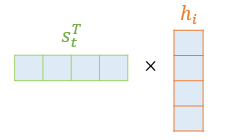

어텐션 스코어 함수를 정의해보면 다음과 같다.

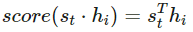


s(t)와 인코더의 모든 은닉 상태의 어텐션 스코어의 모음값을 e(t)라고 정의한다.

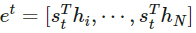

#### 2) 소프트맥스(softmax) 함수를 통한 어텐션 분포(Attention Distribution)를 구하기

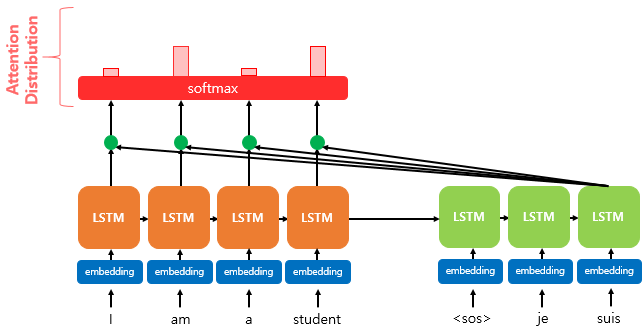

e(t)에 소프트맥스 함수를 적용하여, 모든 값을 합하면 1이 되는 확률 분포를 얻어낸다. 이게 어텐션 분포다.

디코더 시점 t에서의 어텐션 가중치의 모음값인 어텐션 분포를 α(t)라고 할 때,

image.png

#### 3) 각 인코더의 어텐션 가중치와 은닉 상태를 가중합하여 어텐션 값(Attention Value)을 구하기

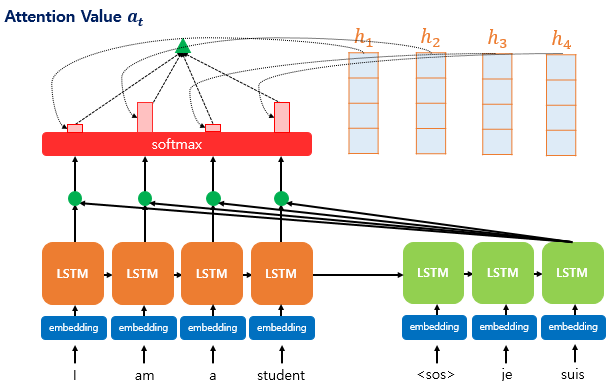

지금까지 구한 값들을 하나로 합치는 단계다. 어텐션의 최종 값을 얻기 위해 각 인코더의 은닉 상태와 어텐션 가중치값들을 곱하고 최종적으로 모두 더한다.

어텐션 함수 출력 값인 어텐션 값(Attention Value) a(t)를 다음의 식으로 구할 수 있다.

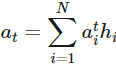

이러한 어텐션 값은 종종 인코더의 문맥을 포함하고 있다고 하여, 컨텍스트 벡터라고도 불린다.

#### 4) 어텐션 값과 디코더의 t 시점의 은닉 상태를 연결(Concatenate)

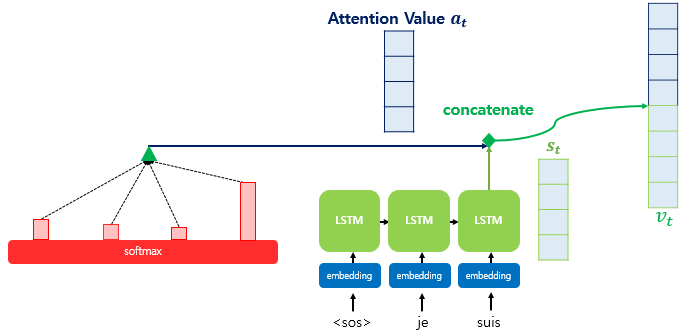

앞서 구한 어텐션 값 a(t)에 s(t)를 결합(Concatenate)해 하나의 벡터로 만드는 작업을 수행한다. 이를 v(t)라고 정의하고, 이 값을 y 예측의 연산의 입력으로 사용한다.

## **Transformer 구조**

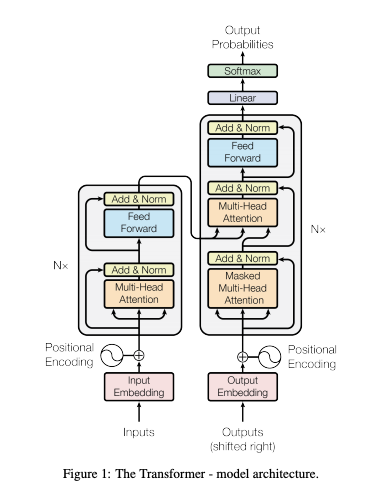

### **인코더 & 디코더**


#### 인코더
- 인코더는 총 여섯 개의 층으로 쌓여져 있다.
- 각 층은 두 개의 sub-layer를 가지고 있다. 첫 번째는 Multi-Head Attetion 층이고, 두 번째는 점별 완전 연결(point wise fully connected) Feed Forward 로 연결되어 있다.

- 두 개의 sub-layer에 각각 잔차 연결(residual connection)을 사용하며, 레이어 정규화(normalization)을 수행한다.

- 즉, 각각의 sub-layer의 output은 LayerNorm(x + Sublayer(x))이고, Sublayer(x)는 sub-layer에서 실행되는 함수다.

- 잔차 연결을 용이하게 하기 위해 모델의 모든 sub-layer 및 임베딩 레이어는 512개의 차원으로 output을 생성한다.

#### 디코더
- 디코더 역시 총 여섯 개의 층으로 쌓여져 있다.

- 두 개의 sub-layer 외에도 인코더의 결과에 Multi-Head Attention을 수행할 세 번째 sub-layer를 추가한다.

- 인코더와 마찬가지로 두 개의 sub-layer에 각각 잔차 연결(residual connection)을 사용하며, 레이어 정규화(normalization)을 수행한다.

### **어텐션**
위에 어텐션에서 설명했듯이, 특정 정보에 좀 더 주의를 기울이는 것이다. 또한 어텐션에는 다양한 계산 방법이 존재하는데, **Transformer**에서는 **Scaled Dot-Product Attention**(스케일드 닷-프로덕트 어텐션)을 사용한다.

#### Scaled Dot-Product Attention
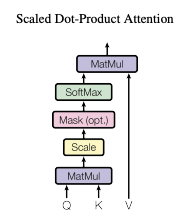

- 입력값은 Query와 차원 d(k)의 Key, 그리고 차원의 값 d(v)를 고려한다. Query와 모든 Key에 대해 내적(dot product) 계산을 하고, 각각 √dk(루트dk)로 나눈 다음, 값에 대한 가중치를 구하기 위해 소프트맥스 함수를 적용한다.

- 동시에 쿼리 집합에 대해 어텐션 함수를 계산하고, 매트릭스 Q로 묶는다. Key와 Value들 또한 각각 K, V 매트릭스로 묶는다. 이를 다음과 같이 쓸 수 있다.

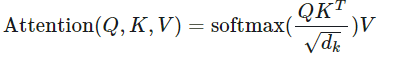

- 가장 많이 사용되는 두 가지 어텐션 함수는 addictive attention과 dot-product attention인데, 스케일드 닷-프로덕트 어텐션은스케일링 요소인 1/√dk (루트dk분의 1)
 가 있다는 것만 제외하면 Dot-Product Attention과 동일하다.

- 소프트맥스를 거친 값을 value 에 곱해준다면, query와 유사한 value일수록 더 높은 값을 가지게 된다 -> **중요한 정보에 더 관심을 둔다!**

#### Multi-Head Attention
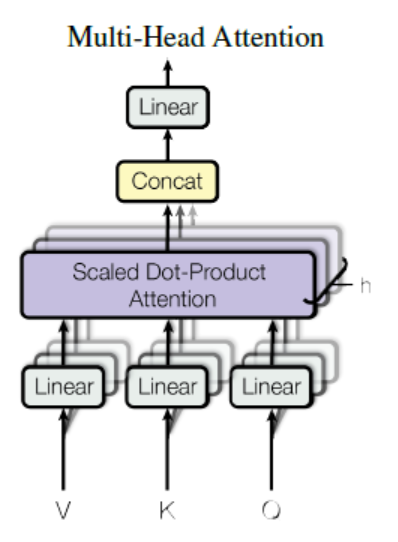

- d(model)-dimensional Key, Value, Query을 가지고 단일 어텐션 함수를 수행하는 것 대신에, 각각 d(k), d(k), d(v) 크기에 대해 서로 다른 학습된 선형 투영(linear projection)을 사용해 h번 수행하는 것이 좋다고 한다.

- 즉 동일한 Q, K, V에 대해 각각 다른 parameter matrix인 W를 곱해주는 것.

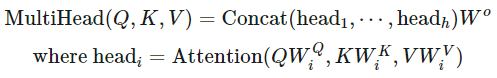

- W는 각각

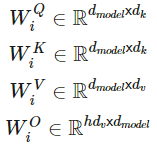

- 순서대로 query, key, value, output에 대한 parameter matrix이다.

- 여기서 8개의 head 또는 레이어를 병렬적으로 사용한다. 각각에 대해 **d(k)= d(v) = d(model)/h =64**를 사용한다. 각 head별로 차원 감소로 인해, 전체 계산 비용은 완전 차원을 가진 단일 어텐션과 유사하다.

#### 어텐션 적용
트랜스포머는 멀티 헤드 어텐션을 **세가지 다른 방법**으로 사용한다.

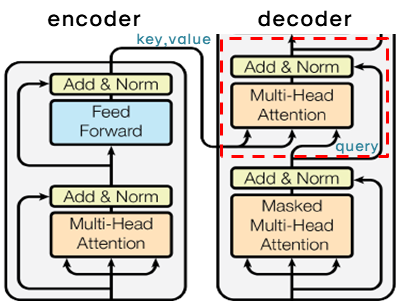


- “인코더-디코더 어텐션” 레이어는 Query가 이전의 디코더 레이어에서 오고, 메모리 Key와 Value는 인코더의 output으로부터 온다. 이렇게 하면 디코더의 모든 위치가 모든 position을 참조할 수 있다. -> **인코더의 output의 모든 position에 attention을 줄 수 있다.**

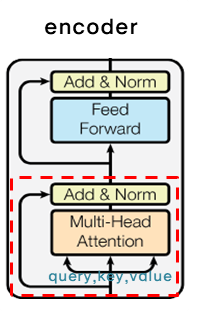

- 인코더는 셀프 어텐션 레이어를 포함한다. 셀프 어텐션의 모든 Key, Value, Query들은 인코더의 이전 레이어의 output에서 온다. 각각의 인코더 포지션은 인코더의 이전 레이어의 모든 position을 참조할 수 있다. -> **이전 레이어의 모든 position에 attention을 줄 수 있다!**

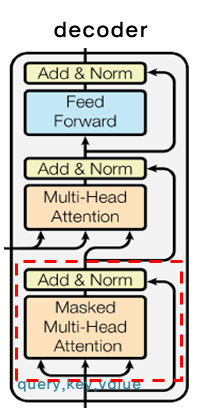

- 마찬가지로, 디코더의 셀프 어텐션 레이어는 디코더의 각 포지션을 해당 포지션까지 포함하여 모든 위치를 처리할 수 있도록 한다. auto-regressive 특성을 보존하기 위해 디코더에서 왼쪽으로 정보가 흐르는 것을 방지할 필요가 있다. -> **i번 째 output을 다시 i+1번 째 input으로 사용하는 auto-regressive한 특성을 유지하기 위해, masking out된 스케일드 닷-프로덕트 어텐션을 적용한다.**

### **점별 피드포워드 네트워크**
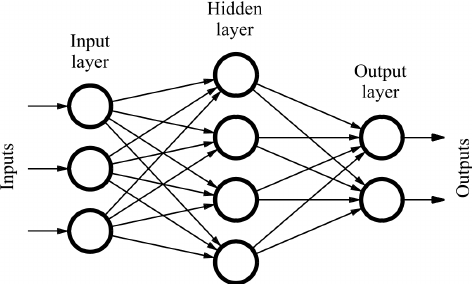

- 어텐션 sub layer에 이어, 인코더와 디코더 레이어 각각 완전 연결된 피드포워드 네트워크를 포함하는데, 이 네트워크는 각 position마다 개별적으로 그리고 동일하게 적용된다(separately and identically). -> position-wise

- 중간에 ReLU 활성화 함수가 있는 두 개의 선형 변환(linear transformation)으로 구성된다.

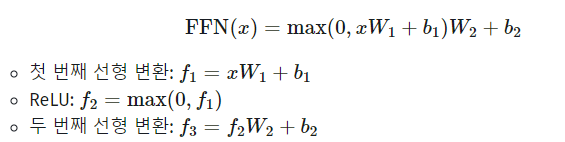

- 선형 변환은 서로 다른 위치에 걸쳐 동일하게 적용되지만, 각각의 층마다 다른 매개변수를 사용한다. -> 커널 사이즈 1을 사용하는 두 개의 Convolution(CNN)이다.

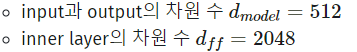

### **임베딩과 소프트맥스**



다른 시퀀스 전달(sequence transduction) 모델과 유사하게, input 토큰과 output 토큰을 d(model) 차원의 벡터로 변환하기 위해 학습이 되어있는 임베딩을 사용한다.

또한 통상적으로 학습된 선형 변환과 소프트맥스 함수를 사용하여 디코더 ouptut을 예측된 다음 토큰 확률로 변환한다.

모델은 두 개의 임베딩 레이어와 사전 소프트맥스 선형 변환 사이에 같은 가중치 매트릭스를 공유한다. 임베딩 레이어는 √d(model) (루트 d(model)을 곱해준다.

### **포지셔널 인코딩**

- 트랜스포머는 recurrence와 convolution을 포함하지 않기 때문에, sequence 순서를 사용하기 위해 순서대로 토큰의 상대적/절대적인 position에 대한 정보를 **주입해야만(must!)** 한다. -> **각 단어별로 position에 대한 정보를 추가해주겠다는 뜻**

- 이를 위해, 인코더와 디코더 스택의 맨 밑(트랜스포머 모델 그림 참조)에 있는 “input embedding”에 “포지셔널 인코딩(positional encoding)”을 추가한다.

- 포지셔널 인코딩은 d(model) (임베딩 차원)과 같은 차원을 같기 때문에 포지셔널 인코딩과 임베딩 벡터는 더해질 수 있다.

- 논문에서는 다른 frequncy(주어진 구간 내에서 완료되는 사이클의 개수)를 가지는 사인함수와 코사인함수를 이용했다0.

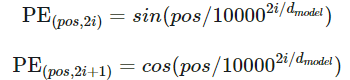

- pos: 포지션, i = 차원. 즉, 포지셔널 인코딩의 각 차원은 사인곡선(sinusoid)에 부합한다. 주기는 10000^2i/d(model) x 2π인 삼각함수. -> pos는 sequence에서 단어의 위치이고 해당 단어는 i에 0부터 d(model)/2
까지를 대입해 d(model)차원의 포지셔널 인코딩 벡터를 얻게 된다.

- 짝수일 때는 사인함수, 홀수일 때는 코사인 함수를 이용. 이렇게 포지셔널 인코딩 벡터를 pos마다 구한다면 비록 같은 column일지라도 pos가 다르다면 다른 값을 가지게 된다!

- 논문에서는 학습된 포지셔널 임베딩 대신 sinusoidal version을 선택했다. 만약 학습된 포지셔널 임베딩을 사용할 경우 training보다 더 긴 sequence가 inference시에 입력으로 들어온다면 문제가 되지만 sinusoidal의 경우 일정하기 때문에 문제가 되지 않습니다. 그냥 좀 더 많은 값을 계산하기만 하면 된다.

## **Why Self-Attention??**

- 이번 section에서는 셀프 어텐션 레이어들과 순환(recurrent) 그리고 convolution 레이어들을 비교한다. 비교 방법은 symbol representations(x1, …, xn)의 one variable-length sequence를 같은 길이 (z1, …, zn)으로 mapping 이다. 우리가 self-attetion을 사용하는 이유는 세 가지이다.

- 첫 번째는 레이어 별 총 연산의 복잡성. 두 번째는 sequential 연산에 최소로 얼마나 필요한지 측정된 병렬 처리 연산량.

- 세 번째는 네트워크에서 long-range dependencies 사이 path length이다. long-range dependencies의 학습은 번역 업무에서 key chanllenge(핵심 도전)이다. 이러한 dependencies을 학습하는 능력에 영향을 미치는 한 가지 핵심 요소는 전달해야 하는 forward 및 backward signal의 길이. input의 위치와 output의 위치의 길이가 짧을수록 dependencies 학습은 더욱 쉬워진다. 그래서 서로 다른 layer types로 구성된 네트워크에서 input과 output 위치 사이 길이가 maximum 길이를 비교한다. -> **단어와 단어 사이가 길 때 얘가 얼마나 잘 기억하냐!**

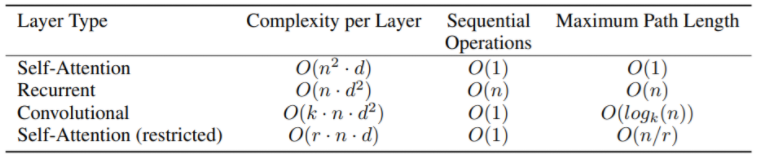

- 위 표에 적혀있듯이, 하나의 셀프 어텐션 레이어는 연속적으로 수행되는 연산 수의 모든 포지션을 연결한다. 반면에 순환 레이어는 O(n)
 만큼의 순차 작업이 필요하다.

- 연산 복잡도 면에서 셀프 어텐션 레이어는 시퀀스가 반복될 때 순환 레이어보다 빠르다. 길이 n은 차원 d보다 작으며, 이는 word-piece나 byte-pair 표현과 같은 기계 번역에서 최첨단 모델이 사용하는 문장 표현에 해당한다.

- 매우 긴 시퀀스를 포함하는 작업에 대한 계산 성능을 개선하기 위해, 셀프 어텐션은 각 출력 위치를 중심으로 한 입력 시퀀스에서 이웃된 r 크기만을 고려하는 것만으로 제한될 수 있다. 이렇게 하면 최대 경로 길이가 O(n/r)로 증가한다. 이건 추후에 조사할 계획이다.

- 커널 길이 k가 n보다 작은 단일 convolutional 레이어는 모든 input과 output 포지션 쌍을 연결하지 않는다. 연결시키기 위해서는 연속적인 커널의 경우 O(n/k)의 convolutional 레이어를 쌓거나, 확장된 convolution의 경우 O(logk(n))만큼 쌓아야 하며 네트워크의 어떤 두 포지션 사이의 가장 긴 경로의 길이를 증가시킨다.

- convolution 층은 일반적으로 순환 층보다 k의 비율로 계산량이 비싸다. 그러나 분리가능한 convolution의 경우, 복잡도는 
O(kxnxd+nxd^2)만큼 상당히 감소한다. k = n이어도 분리 가능한 convolution의 복잡도는 트랜스포머에서 사용하는 접근방식인 셀프어텐션과 점별 피드포워드 레이어의 결합과 같다.

- 추가로 얻는 이익으로서, 셀프 어텐션은 더 많은 해석 가능한 모델을 산출할 수 있다.

## **Train**

### **Optimizer**

- adam 을 사용했으며 β(1) = 0.9, β(2) = 0.98 그리고 ϵ=10^−9
를 사용했다.

- 학습 비율(learning rate)은 가변적으로 변한다.

image.png

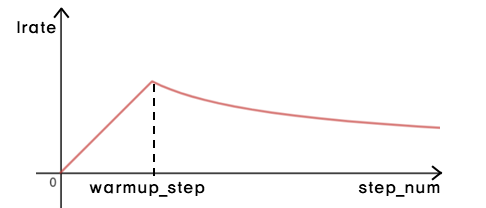

- warmup_step까지는 linear하게 learning rate를 증가시키다가 warmup_step 이후에는 step_num의 inverse square root에 비례하도록 감소시켰다. 여기서 warmup_step = 4000 사용했다.

### **Normalization**

잔차 드롭아웃
각 sub-layer의 output에 드롭아웃을 적용하고, sub-layer input에 추가하여 normalize한다. 또한 인코더 스택과 디코더 스택의 임베딩 및 포지셔널 인코딩의 합에 드롭아웃을 적용했다. 모델에서 드롭아웃 비율은 0.1로 설정했다.

라벨 스무딩 : https://arxiv.org/pdf/1512.00567.pdf

훈련하는 동안, 라벨 스무딩을 적용했다. ϵ(ls)=0.1
. 이것은 모델이 더 확실하지 않다는 것을 학습하면서 혼란을 주지만 정확성과 BLEU 점수를 향상시킨다.

## **결론**

본 연구에서는, 인코더 디코더 아키텍처에서 가장 일반적으로 사용되는 순환 레이어를 멀티 헤드 셀프 어텐션으로 대체하면서, 전적으로 어텐션만을 사용한 최초의 시퀀스 변환 모델인 Transformer를 제시했다.

번역 과제의 경우, 트랜스포머는 순환 또는 convolutional 레이어에 기반한 구조보다 훨씬 빠르게 훈련될 수 있다.